<a href="https://colab.research.google.com/github/Charmaineem/ML/blob/main/Handwritten_digits_using_Logistic_Regression_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Logistic Regression Classifier in PyTorch

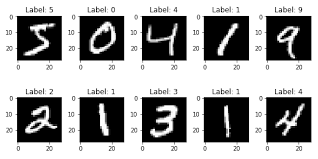

In this project, I will use PyTorch to build a classifier capable of identifying handwritten digits from the [MNIST dataset](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html). The MNIST dataset is a benchmark dataset for image classification and contains 60,000 training samples and 10,000 test samples, each consisting of 28x28 grayscale images of handwritten digits (0-9).

Before diving into building the classifier, let's briefly cover an essential concept in machine learning that we’ll use in this project: logistic regression.

### Logistic Regression
Logistic regression is a supervised machine learning algorithm used primarily for binary classification tasks, but it can be extended for multiclass classification, as in our MNIST project. Logistic regression uses the sigmoid function to map predicted values to a probability range between 0 and 1, allowing it to output the likelihood of a particular class label.

#### **Step 1**: Data preparation

First, we need to load the MNIST dataset. PyTorch provides a convenient way to download and transform this dataset via the torchvision.datasets module. Here are the key parameters for loading the dataset:

1. root: The path where data will be stored.
2. train: Boolean indicating whether to load the training set (True) or test set (False).
3. download: Boolean indicating whether to download the dataset if it’s not already available in the specified root directory.
4. transform: An optional parameter to specify transformations that should be applied to the images, such as scaling, normalization, or conversion to tensors.

In [25]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
from torch.autograd import Variable

In [40]:
train_dataset = datasets.MNIST(
    root='data',
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

test_dataset = datasets.MNIST(
    root='data',
    download=True,
    train=False,
    transform=transforms.ToTensor()
)

In [15]:
print(f'The trainset has {len(train_dataset)} samples')
print(f'The testset has {len(test_dataset)} samples')

The trainset has 60000 samples
The testset has 10000 samples


Here, I am using DataLoader to create an iterable wrapper around the dataset, which simplifies the process of accessing and managing data samples in batches.

In [16]:
batch_size = 64

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

By iterating over the test_dataloader, we can examine the structure of the data batches provided to the model. Let’s look at the output dimensions for a single batch of images and labels:

- 64 images in the batch: This batch size, defined during DataLoader setup, means we’re processing 64 images at a time.
- 1 input channel: Each image has a single color channel, indicating it’s a grayscale image rather than a color image with RGB channels.
- 28 pixels for both height and width: Each image is 28x28 pixels, consistent with the standard MNIST dimensions.


In [17]:
for X, y in test_dataloader:
  print(f'{X.shape}')
  print(f'{y.shape}')
  break


torch.Size([64, 1, 28, 28])
torch.Size([64])


#### **Step 2**: Visualize the Data (Optional)

To better understand the data, let’s visualize some sample images and their corresponding labels. Let's take a look at the first image.

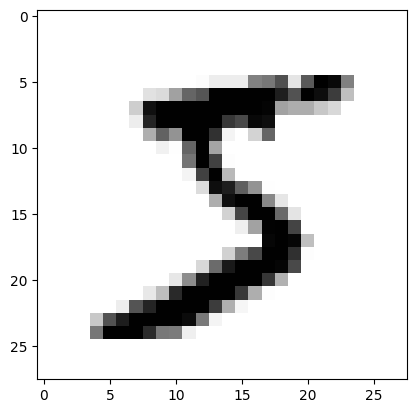

In [18]:
img = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img, cmap='gray_r')

#### **Step 3**: Define the Neural Network Model

We will define a simple logistic regression model by creating a class that inherits from nn.Module. Logistic regression, in this case, serves as a linear classifier that directly maps input image features to the output classes using a fully connected layer. This model is suitable for classification tasks like MNIST digit recognition, where each input image belongs to one of 10 digit classes (0–9).

Key parameters for the model:

- input_size = 784: Since each image is 28x28 pixels, we flatten it to a 784-dimensional vector (28 × 28 = 784).
- num_classes = 10: The number of output classes, representing digits from 0 to 9.
- num_epochs = 5: The number of times we’ll iterate through the entire training dataset.
- learning_rate = 0.001: The rate at which the model updates its weights during training.

In [19]:
input_size = 784
num_classes = 10
num_epochs = 5
learning_rate = 0.001

In [27]:
class LogisticRegression(nn.Module):
  def __init__(self,input_size,num_classes):
    super(LogisticRegression,self).__init__()
    self.linear = nn.Linear(input_size,num_classes)

  def forward(self, x):
    out = self.linear(x)
    return out

#### **Step 4**: Training and Evaluation

We will train the logistic regression model using the training dataset and then evaluate its performance on the test dataset. We will use the cross-entropy loss as our loss function and Stochastic Gradient Descent (SGD) as our optimizer.

In [28]:
model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)


In [39]:
total = 0
correct= 0

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_dataloader):
    optimizer.zero_grad()
    outputs = model(images.reshape(-1, 28*28))
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

  for i, (images,labels) in enumerate(test_dataloader):
    outputs = model(images.reshape(-1,28*28))
    _, predicted = torch.max(outputs.data,1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

  accuracy = correct/total * 100
  print('Epoch: {}. Loss: {}. Accuracy: {}.'.format(epoch+1, loss.item(), accuracy))

Epoch: 1. Loss: 0.4704495370388031. Accuracy: 88.16999816894531.
Epoch: 2. Loss: 0.6268007159233093. Accuracy: 88.20499420166016.
Epoch: 3. Loss: 0.5869386196136475. Accuracy: 88.25666809082031.
Epoch: 4. Loss: 0.5308238863945007. Accuracy: 88.30000305175781.
Epoch: 5. Loss: 0.8960478901863098. Accuracy: 88.33799743652344.


After training the model for five epochs, we achieved an accuracy of 88% on the test set, demonstrating the effectiveness of logistic regression for this classification task.